# Reading external data & ploting

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

> **%matplotlib inline** With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, 
directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

Pandas can easily read data stored in different file formats like CSV, JSON, XML or even Excel. Parsing always innvoles specifying
the correct structure, cncoding and other details. The read_csv method reads CSV files and accepts many parameters.

In [86]:
pd.read_csv # statement

<function pandas.io.parsers.read_csv(filepath_or_buffer: Union[ForwardRef('PathLike[str]'), str, IO[~T], io.RawIOBase, io.BufferedIOBase, io.TextIOBase, _io.TextIOWrapper, mmap.mmap], sep=<object object at 0x0000021C9AA66B20>, delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory

In [155]:
df=pd.read_csv('btc_market_price.csv')

In [156]:
df.head() # you can directly edit file in file editor with adding or delete directly.

,2021-09-18 02:00:00,47374
0,2021-09-18 03:00:00,47642.50
1,2021-09-18 04:00:00,47692.63
2,2021-09-18 05:00:00,47944.80
3,2021-09-18 06:00:00,48349.25
4,2021-09-18 07:00:00,48676.24


The CSV file we're reading has only two columns: timestamp and price. It doesn't have the header, it contains whitespaces and has values
separated by commas. Pandas automatically assigned the first row of adata as headers ,which is incorrect. 
We can overwrite this behavior with the header parameter:

In [157]:
df= pd.read_csv('btc_market_price.csv', header=None)
df.head()

,0,1
0,2021-09-18 02:00:00,47374.00
1,2021-09-18 03:00:00,47642.50
2,2021-09-18 04:00:00,47692.63
3,2021-09-18 05:00:00,47944.80
4,2021-09-18 06:00:00,48349.25


And then set the column(s) name with **df.columns** attribute:

In [158]:
df.columns = ['Timestamp', 'Price']
df.head()

,Timestamp,Price
0,2021-09-18 02:00:00,47374.00
1,2021-09-18 03:00:00,47642.50
2,2021-09-18 04:00:00,47692.63
3,2021-09-18 05:00:00,47944.80
4,2021-09-18 06:00:00,48349.25


The types of the Price columns was correctly interpreted as float, but the timestamp was interpreted as a regular string(object in pandas notation)

In [159]:
df.columns.dtype, df.head(2), df.tail(2) # df.info(), df.describe(), df.shape, df.size...

(dtype('O'),
              Timestamp    Price
 0  2021-09-18 02:00:00  47374.0
 1  2021-09-18 03:00:00  47642.5,
                Timestamp     Price
 160  2021-09-24 18:00:00  42221.31
 161  2021-09-24 19:00:00  42025.61)

We can perform a vectorized operation to parse all the Timestamp values as Datetime objects:

In [163]:
pd.to_datetime(df['Timestamp']).head(2) # if this can't work, use df['column_name'] = df['datetime_value_column'].dt.date

0   2021-09-18 02:00:00
1   2021-09-18 03:00:00
Name: Timestamp, dtype: datetime64[ns]

In [176]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
#if you just want get date part, format it from beginning or use df['Timestamp'] = df['Timestamp'].dt.date 
#but the type of column is str (O type)

In [178]:
df.head(2) # If the df['Timestamp'] = df['Timestamp'].dt.date already work, you can't re-run the it agains unless you want get an error.

,Price
Timestamp,
2021-09-18 02:00:00,47374.0
2021-09-18 03:00:00,47642.5


In [179]:
df.dtypes # the type of .dt.date is object while the type of to_datetime is datetime64[ns]

Price    float64
dtype: object

In [169]:
df.set_index('Timestamp', inplace=True) # Afther this, you can access Data row by loc using index row

In [180]:
df.iloc[0]

Price    47374.0
Name: 2021-09-18 02:00:00, dtype: float64

In [181]:
df.loc['2021-09-18'].head(2)

,Price
Timestamp,
2021-09-18 02:00:00,47374.0
2021-09-18 03:00:00,47642.5


### Putting everything together

And now, we've finally arried to the final, desired version of the DataFrame parsed from our CSV file, the steps were:

In [197]:
df= pd.read_csv('btc_market_price.csv')
df.columns = (['Index','Price'])
#df['Timestamp'] = pd.to_datetime(df['Timestamp']) This is set before and don't change in original file, so you can re-run this code
#df.set_index('Timestamp', inplace= True) similar above

In [189]:
df.head()

,Index,Price
0,2021-09-18 03:00:00,47642.50
1,2021-09-18 04:00:00,47692.63
2,2021-09-18 05:00:00,47944.80
3,2021-09-18 06:00:00,48349.25
4,2021-09-18 07:00:00,48676.24


Or you can combine these code in one command:

In [202]:
df = pd.read_csv('btc_market_price1.csv', header = None, names = ['Timestamp', 'Price'], index_col=0, parse_dates = True)
# index_col=0 similar to df.set_index(column = 'Timestamp')
# parse_dates = True similar to df['Timestamp'] = pd.to_date(df['Timestamp'])
# if the datetime column is the sameday but differ timstamp the parse_dates will return both date & time part.
#It just change the type of column and you can't access the row by .loc method with just date part.

In [203]:
df.head()

,Price
Timestamp,
2021-09-18,47374.00
2021-09-19,47642.50
2021-09-20,47692.63
2021-09-21,47944.80
2021-09-22,48349.25


In [204]:
df.loc['2021-09-18']

Price    47374.0
Name: 2021-09-18 00:00:00, dtype: float64

### Plotting basics

<AxesSubplot:xlabel='Timestamp'>

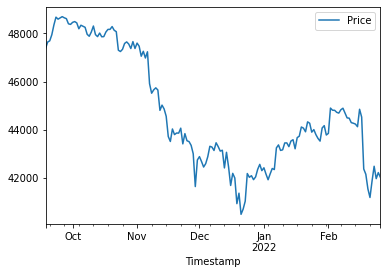

In [209]:
df.plot()

Behind the scenes, it's using **matplotlib.pyplot** interface. We can create a similar plot with the **plt.plot()** function.

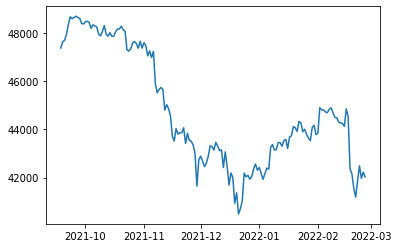

In [214]:
plt.plot(df.index, df['Price'])

**Matplotlib.pyplot(plt)** accepts many parameters but the most important is first two parameter:

* The value for X axis

* The value for Y axis

In [217]:
x = np.arange(-10, 11)
x

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

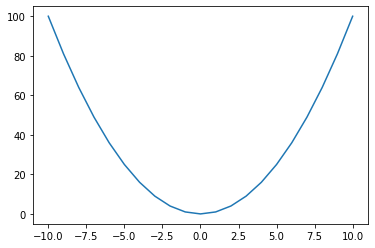

In [216]:
plt.plot(x, x**2)

We're using **matplotlib's global** API, which is horrible, but it's the most popular. We'll learn how to use the OOP API which will
make our work much easier.

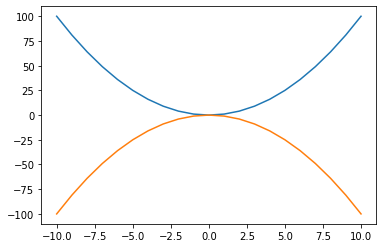

In [220]:
plt.plot(x, x**2)
plt.plot(x, -1*(x**2))

Each **plt** function alters the global state. If you want to set settings of your plot, you can use the **plt.figure** function.
Other like **plt.title** keep altering the global plot.

Text(0.5, 1.0, 'Nice Plot')

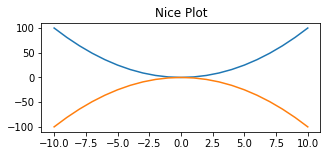

In [ ]:
plt.figure(figsize = (5,2)) # width, length
plt.plot(x, x**2)
plt.plot(x, -1*(x**2))
plt.title('Nice Plot')

Some of the arguments in **plt.figure** and **plt.plot** are available in teh pandas's **plot** interface:

<AxesSubplot:title={'center':'Nice Plot'}, xlabel='Timestamp'>

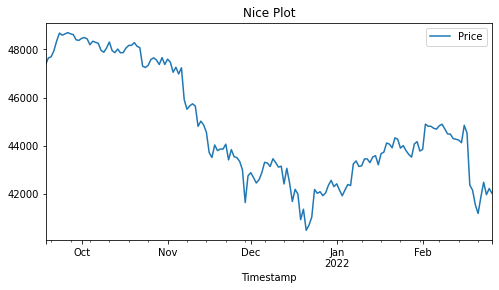

In [ ]:
df.plot(figsize = (8,4), title='Nice Plot')

<AxesSubplot:xlabel='Timestamp'>

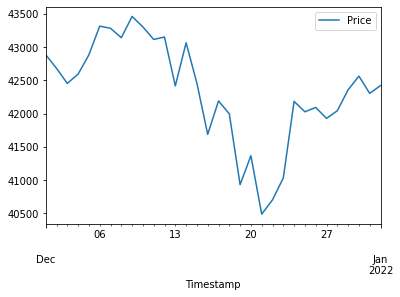

In [227]:
df.loc['2021-12-01':'2022-01-01'].plot() # See details in the interval if there are issues